# Machine learning
### Clustering
### Dawid Lisek 

Imports:

In [1]:
from sklearn.datasets import make_blobs, make_moons, make_circles
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, k_means, DBSCAN, AgglomerativeClustering
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import time


### K-means clustering - example I

Ex.1 Please analyse the function parameters and generated output.

In [2]:
help(make_blobs)

Help on function make_blobs in module sklearn.datasets._samples_generator:

make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)
    Generate isotropic Gaussian blobs for clustering.
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int or array-like, default=100
        If int, it is the total number of points equally divided among
        clusters.
        If array-like, each element of the sequence indicates
        the number of samples per cluster.
    
        .. versionchanged:: v0.20
            one can now pass an array-like to the ``n_samples`` parameter
    
    n_features : int, default=2
        The number of features for each sample.
    
    centers : int or ndarray of shape (n_centers, n_features), default=None
        The number of centers to generate, or the fixed center locations.
        If n_samples 

Ex.2 Please call make_blob and generate a dataset with 120 samples, 2 features, 4 centres (clusters), and cluster_std=0.40.

In [3]:
X, y = make_blobs(n_samples=120, n_features=2, centers=4, cluster_std=0.4)

Ex.3 Analyse the x and y shape.

In [4]:
X.shape

(120, 2)

In [5]:
y.shape

(120,)

Ex.4 Plot the data samples in X to see the clusters.

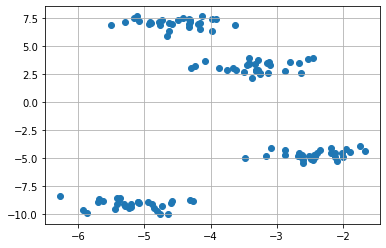

In [6]:
plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.show()

Ex.5 Run the implemented function K-Means, fit the model and predict the outcome.

In [7]:
k_means_model = KMeans(n_clusters=4)
k_means_model.fit(X, y)
pred = k_means_model.predict(X)

Ex.6 Plot the results in order to see whether the clustering worked.

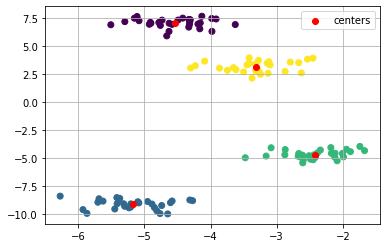

In [8]:
centers = k_means_model.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.scatter(centers[:, 0], centers[:, 1], c='red', label = 'centers')
plt.legend()
plt.grid()
plt.show()

Ex.7 Calculate inertia or Dunn index jgmcvi (optional).

In [9]:
print(f'Inertia: {k_means_model.inertia_}')

Inertia: 44.12150314391479


### K-means clustering - example II

Change the parameters of our data generation process to create different-looking clusters (eg. about 5 clusters and cluster_std=0.8).

Ex.1 Plot the data

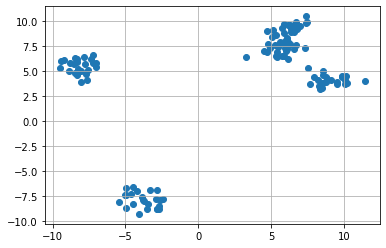

In [10]:
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)

plt.figure()
plt.scatter(X[:,0], X[:,1])
plt.grid()
plt.show()

Ex.2 Predict for the same nb. of clusters = 5.

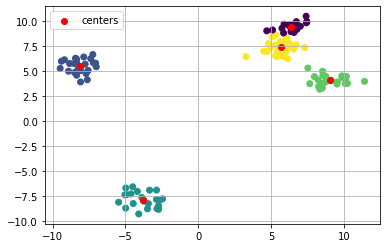

In [11]:
k_means_model = KMeans(n_clusters=5)
k_means_model.fit(X, y)
pred = k_means_model.predict(X)
centers = k_means_model.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.scatter(centers[:, 0], centers[:, 1], c='red', label = 'centers')
plt.legend()
plt.grid()
plt.show()

In [12]:
print(f'Inertia: {k_means_model.inertia_}')

Inertia: 125.47479889185203


Ex.3 Predict for 2 instead of 5 clusters.

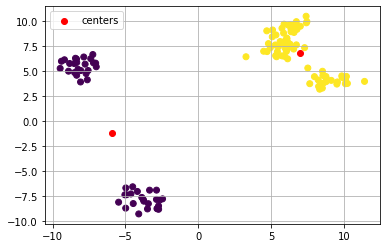

In [13]:
k_means_model = KMeans(n_clusters=2)
k_means_model.fit(X, y)
pred = k_means_model.predict(X)
centers = k_means_model.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.scatter(centers[:, 0], centers[:, 1], c='red', label = 'centers')
plt.legend()
plt.grid()
plt.show()

In [14]:
print(f'Inertia: {k_means_model.inertia_}')

Inertia: 2970.392942498563


### K-means ++

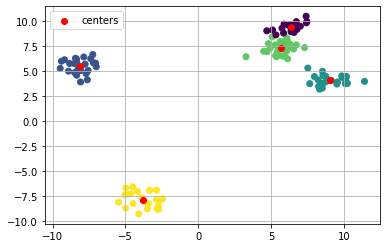

In [15]:
k_means_model = KMeans(n_clusters=5, init='random')
k_means_model.fit(X, y)
pred = k_means_model.predict(X)
centers = k_means_model.cluster_centers_
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=pred)
plt.scatter(centers[:, 0], centers[:, 1], c='red', label = 'centers')
plt.legend()
plt.grid()
plt.show()

In [16]:
print(f'Inertia: {k_means_model.inertia_}')

Inertia: 125.51311605852453


### Elbow method

Ex.1 Run K-Means for a range of clusters using a for loop and collecting the distortions (inertia) into a list.

In [17]:
inertias = []
X, y = make_blobs(n_samples=120, n_features=2, centers=5, cluster_std=0.8)
for cluster_num in range (1, 21):
    k_means_model = KMeans(n_clusters=cluster_num)
    k_means_model.fit(X, y)
    inertias.append(k_means_model.inertia_)

c:\Users\dawid\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Ex.2 Plot the distortions of K-Means.

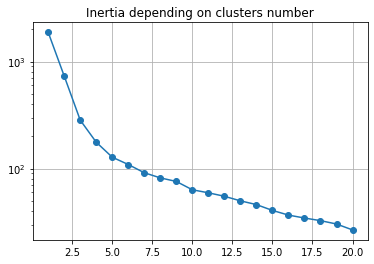

In [18]:
plt.figure()
plt.semilogy(range(1, 21), inertias, marker = 'o')
plt.title('Inertia depending on clusters number')
plt.grid()
plt.show()

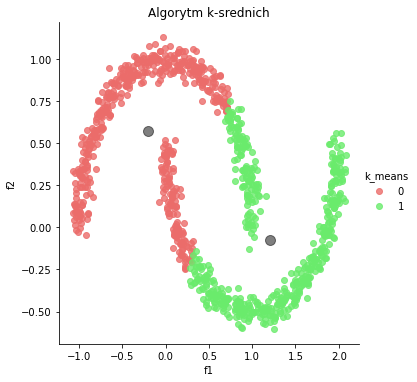

In [20]:
x, y = make_moons(1000, noise=.05, random_state=0)
X_moon = pd.DataFrame(x, columns = ['f1','f2'])

k_means_model = KMeans(init='k-means++', n_clusters=2)
k_means_model.fit(x, y)
y_km = k_means_model.predict(x)
centers = k_means_model.cluster_centers_
 
#Plot
X_moon['k_means'] = y_km
sns.lmplot(data=X_moon, x='f1', y='f2', fit_reg=False, hue = 'k_means', palette = ['#eb6c6a', '#6aeb6c']).set(title='Algorytm k-srednich')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)
plt.show()

### Clustering II - hierarchical methods

In [21]:
X, y_true = make_blobs(n_samples=300, centers=5, cluster_std=0.8, random_state=0)

Ex.1 Plot the data

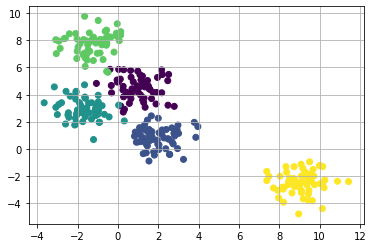

In [22]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.grid()
plt.show()

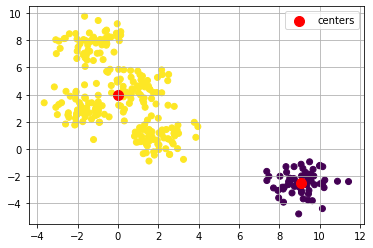

In [23]:
centers, label, _ = k_means(X, n_clusters=2)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label='centers')
plt.legend()
plt.grid()
plt.show()

Ex.3 Use the scipy libraries to draw the dendrogram for the data:

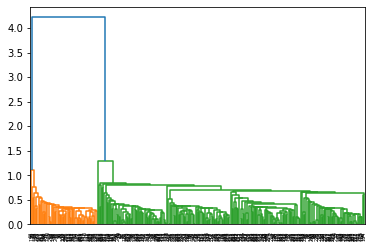

In [24]:
Z = linkage(X)
dn = dendrogram(Z)

Ex.4 Something this makes clear is that visualizing the dengrogram is useful, but it's not for big dataset. Create a smaller dataset to draw a dendogram.

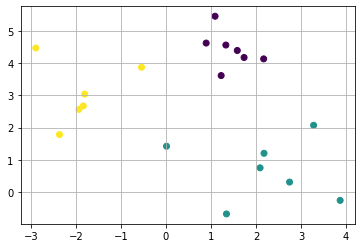

In [25]:
X, y_true = make_blobs(n_samples=20, centers=3, cluster_std=0.8, random_state=0)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.grid()
plt.show()

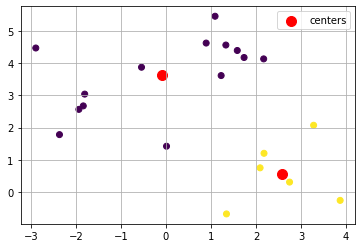

In [26]:
centers, label, _ = k_means(X, n_clusters=2)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, label='centers')
plt.legend()
plt.grid()
plt.show()

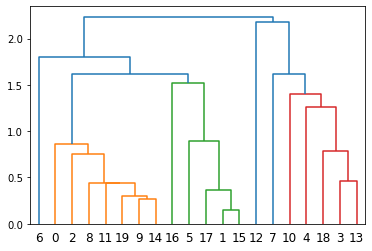

In [27]:
Z = linkage(X)
dn = dendrogram(Z)

### Agglomerative clustering

Dataset import:

In [28]:
shopping_data = pd.read_csv("shopping_data.csv")
shopping_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Ex.5 Please read the dataset and choose columns to further analysis. The dataset contains 200 records and 5 attributes. Use only Annual Income (in thousands of dollars) and Spending Score (1-100) columns for clustering.

In [29]:
X = shopping_data[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Ex.6 Create a dendrogram to chose the appropriate k value.

Ex.7 Analyse results for different linkage values - single, average,complete linkage and Ward.

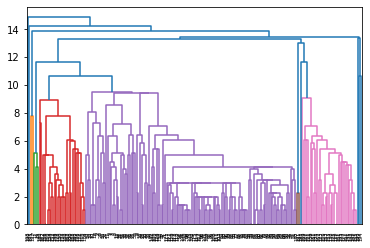

In [30]:
Z = linkage(X, method='single')
dn = dendrogram(Z)

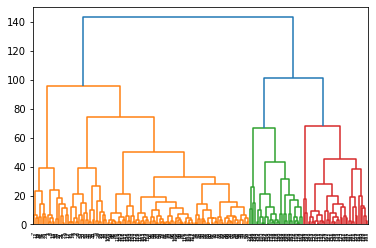

In [31]:
Z = linkage(X, method='complete')
dn = dendrogram(Z)

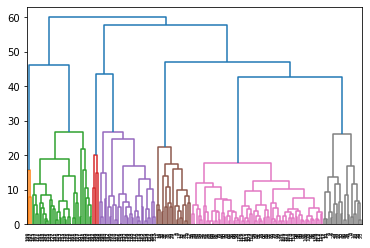

In [32]:
Z = linkage(X, method='average')
dn = dendrogram(Z)

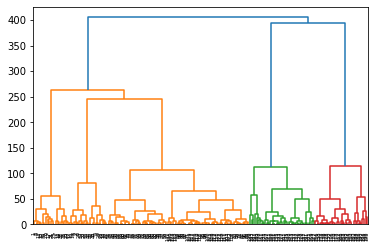

In [33]:
Z = linkage(X, method='ward')
dn = dendrogram(Z)

Ex.8 Use the AgglomerativeClustering class of the sklearn.cluster library to build the model predict clusters.

Ex.9 Plot the clusters to see how actually our data has been clustered.

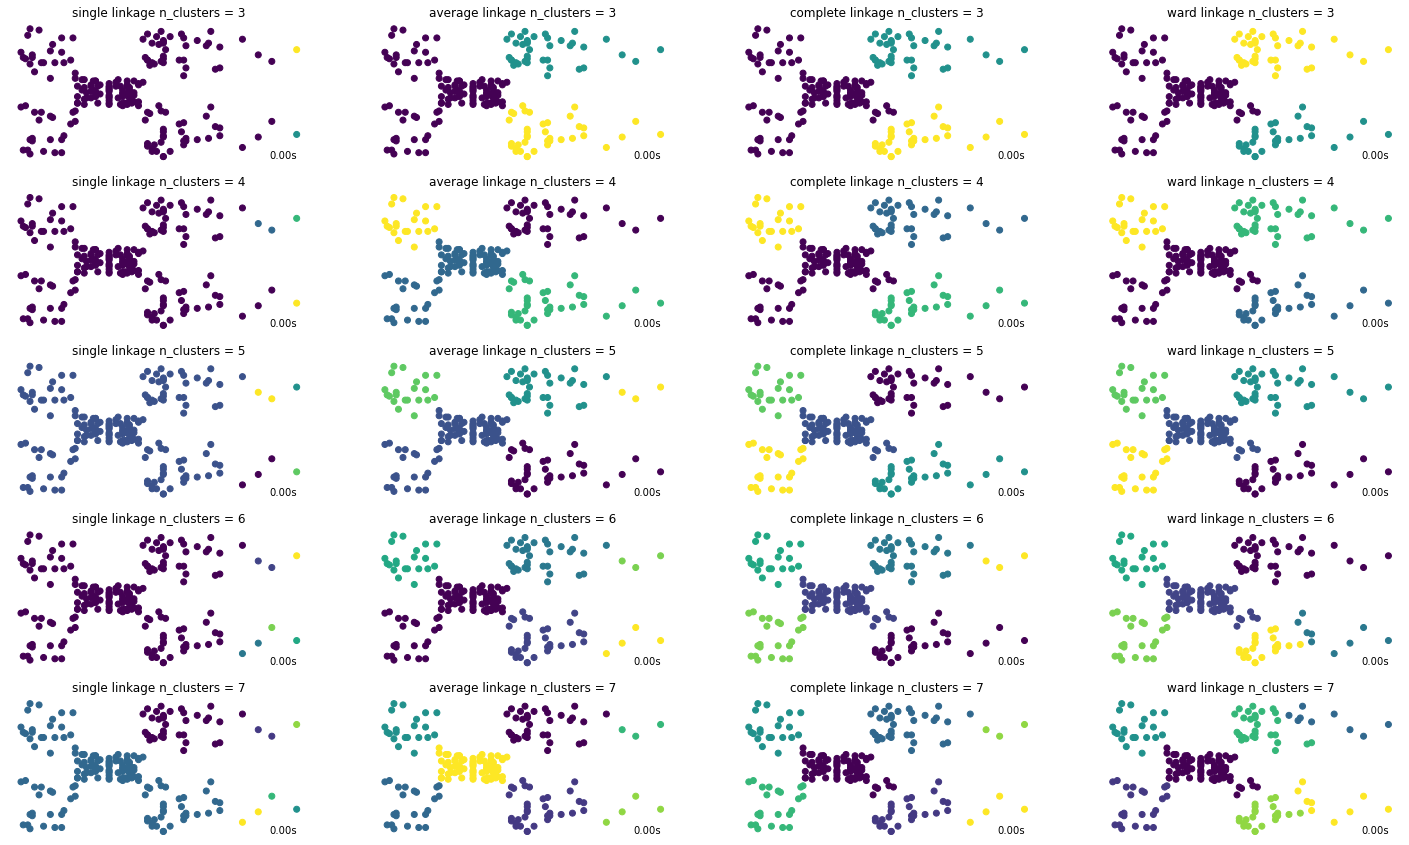

In [34]:
clustering_methods = ['single', 'average', 'complete', 'ward']
clusters_num =[num for num in range(3, 8)]

X = X.values

fig, ax = plt.subplots(len(clusters_num), len(clustering_methods), figsize=(25, 15))
for row, n_clusters in enumerate(clusters_num):
    for col, method in enumerate(clustering_methods):
        start_time = time.time()
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        clustering.fit(X)
        end_time = time.time()
        

        ax[row, col].scatter(X[:, 0], X[:, 1], c=clustering.labels_)
        ax[row, col].set_title(f'{method} linkage n_clusters = {n_clusters}')
        ax[row, col].axis('off')
        ax[row, col].text(125, .01, f'{(end_time - start_time):.2f}s')

### Selecting the number of clusters with silhouette analysis on KMeans clustering

Ex.1 Create the dataset:

In [35]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1) 

Ex.2 Determine the cluster range [2,3….]

Ex.3 Iterate for all the values in cluster range:

- Perform k-Means
- Calculate and print the silhouette_score
- Compute the silhouette scores for each sample
- Aggregate the silhouette scores for samples belonging to cluster i, sort them and plot (visualization the result)
- Have a look here to check you solution and plot the silhouette plot

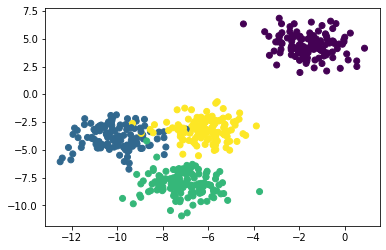

In [36]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


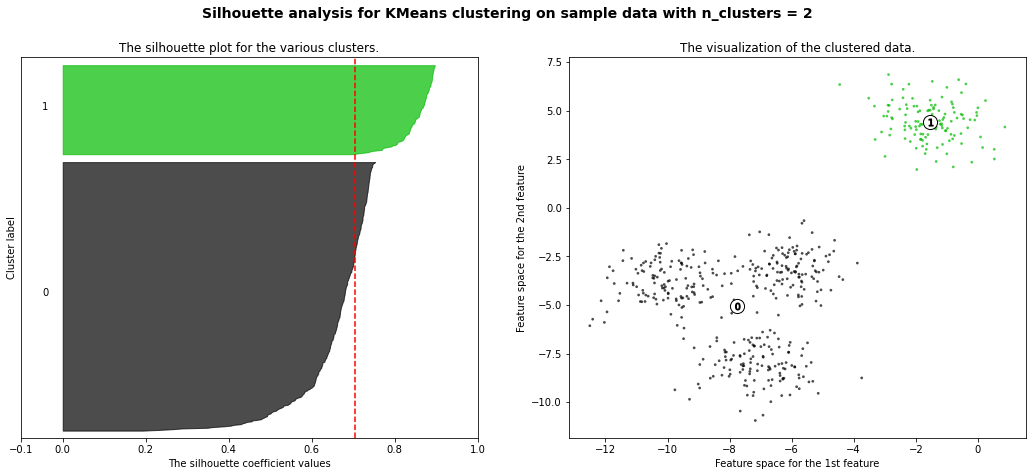

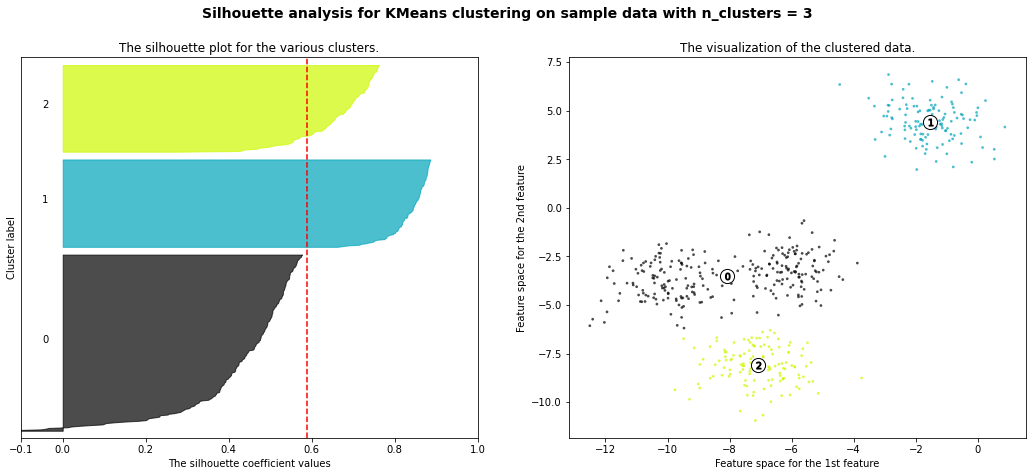

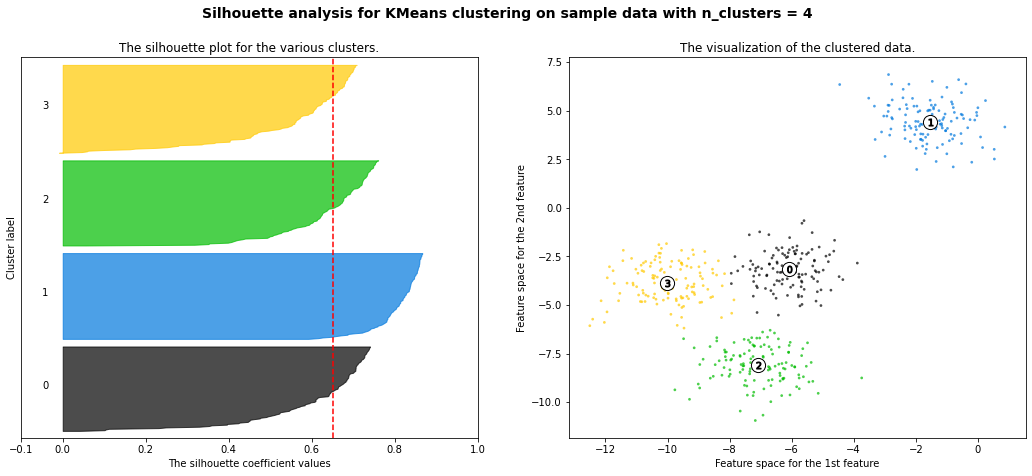

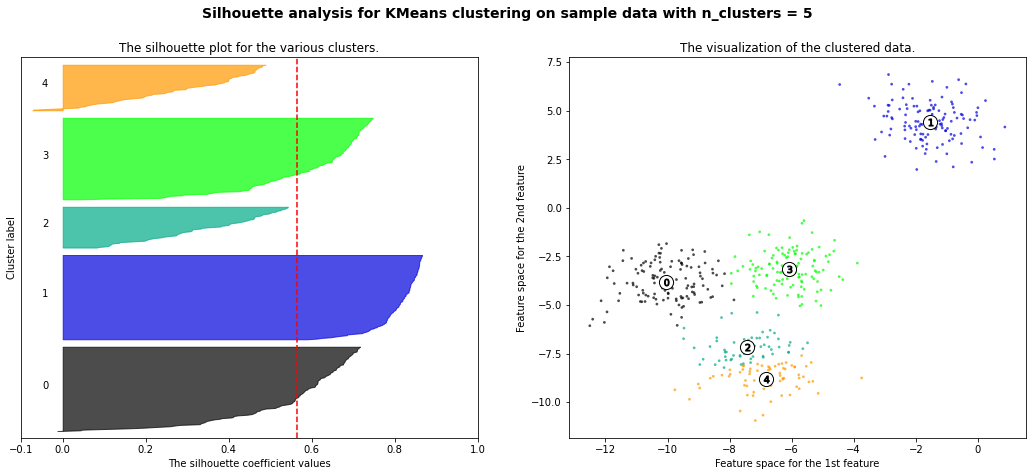

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### DBSCAN algorithm

In [38]:
# ============
# Generate datasets.
# ============
n_samples = 1500
noisy_circles = make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
blobs = make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
 
# Anisotropicly distributed data
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
 
# blobs with varied variances
varied = make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

                            

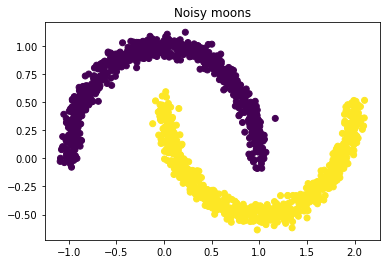

In [39]:
plt.figure()
plt.scatter(noisy_moons[0][:, 0], noisy_moons[0][:, 1], c = noisy_moons[1])
plt.title('Noisy moons')
plt.show()

Ex.1 Comparing different (KMeans, agglomerative, DBSCAN) clustering algorithms on following datasets:

In [40]:
datasets_list = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
datasets_names = ['noisy_circles', 'noisy_moons', 'blobs', 'no_structure', 'aniso', 'varied']

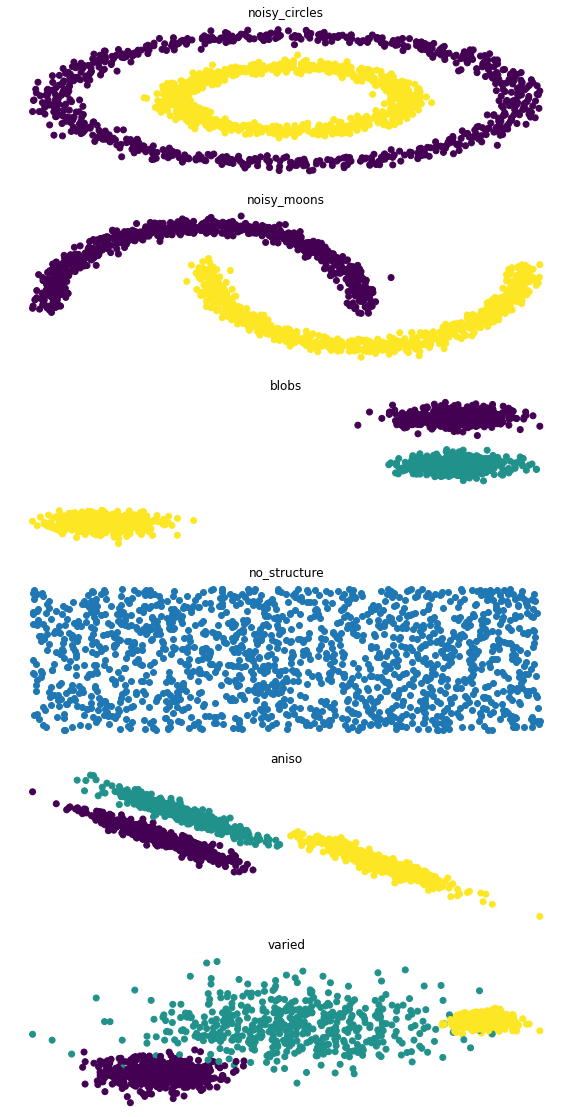

In [41]:
fig, ax = plt.subplots(6, figsize=(10, 20))
for row, dataset in enumerate(datasets_list):
    ax[row].scatter(dataset[0][:, 0], dataset[0][:, 1], c = dataset[1])
    ax[row].set_title(datasets_names[row])
    ax[row].axis('off')
    

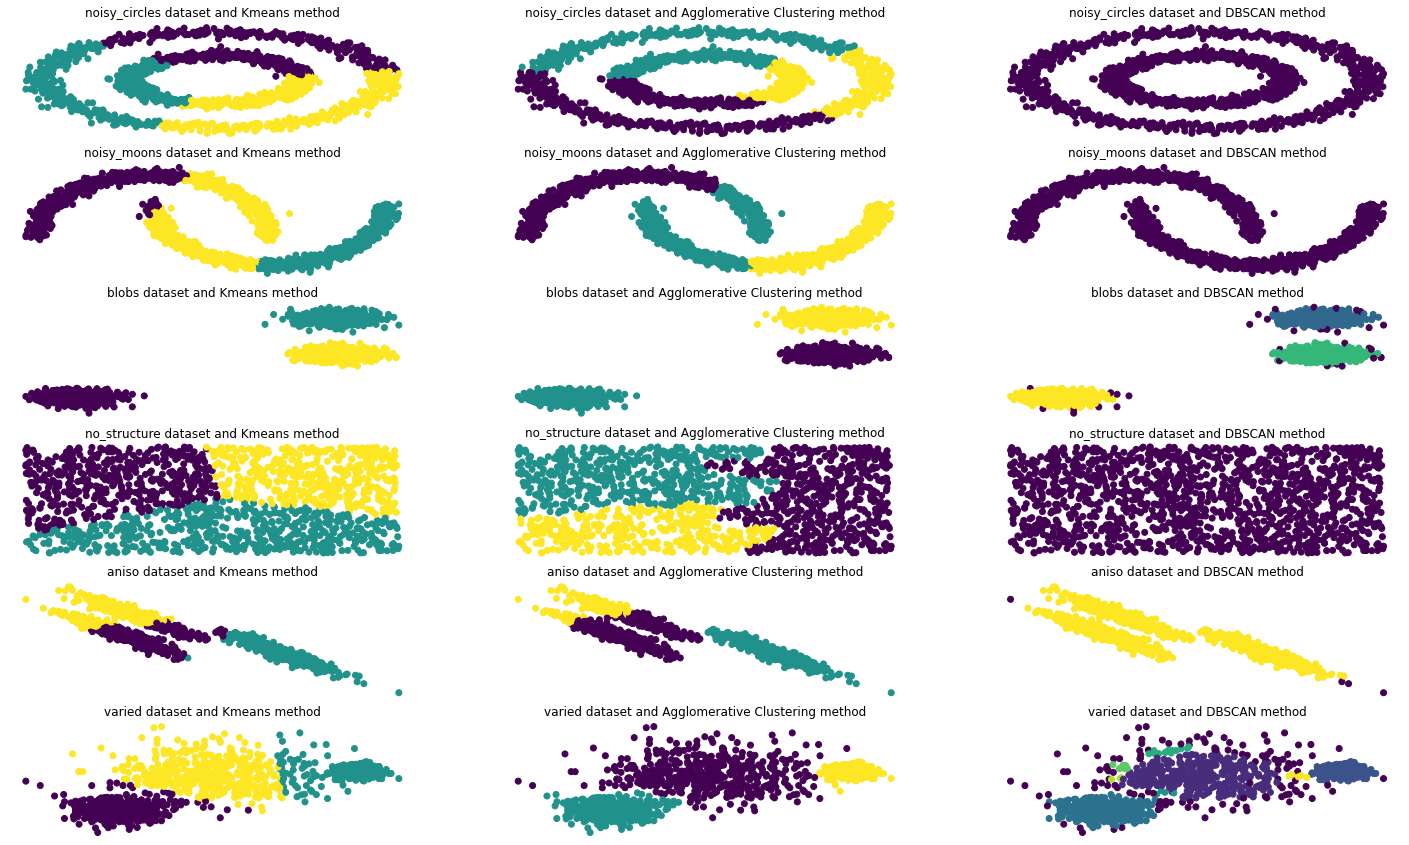

In [42]:
method_names = ['Kmeans', 'Agglomerative Clustering', 'DBSCAN']

fig, ax = plt.subplots(len(datasets_list), 3, figsize=(25, 15))

for row, dataset in enumerate(datasets_list):

    kmeams_pred = KMeans(n_clusters=3).fit_predict(dataset[0], dataset[1])
    agglomerative_pred = AgglomerativeClustering(n_clusters=3).fit_predict(dataset[0] ,dataset[1])
    dbscan_pred = DBSCAN().fit_predict(dataset[0], dataset[1])
    preds = [kmeams_pred, agglomerative_pred, dbscan_pred]

    for col in range(3):
        
        ax[row, col].scatter(dataset[0][:, 0], dataset[0][:, 1], c = preds[col])
        ax[row, col].axis('off')
        ax[row, col].set_title(f'{datasets_names[row]} dataset and {method_names[col]} method')
        